# 1. 기존의 프로그램 방식

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 섭씨온도(인풋데이터)를 받아 화씨온도로 출력
def celsisu_to_faherenheit(c):
    return c * 1.8 + 32

In [3]:
input_c = int(input('섭씨온도는 ?'))
print('화씨온도는 ',celsisu_to_faherenheit(input_c))

섭씨온도는 ?0
화씨온도는  32.0


# 2. 머신러닝 프로그램 방식
- 1. 데이터 확보 및 생성
- 2. 데이터 전처리 : 훈련데이터셋(학습데이터셋, 검증데이터셋, 시험데이터셋,....)
- 3. 모델 구성
- 4. 모델 학습과정 설정
- 5. 모델 학습시키기
- 6. 모델 평가(시험데이터셋으로)
- 7. 모델 사용(입력값을 주어지면 예측값을 받기)

## 2.1 노이즈가 없는 데이터로 실습

In [4]:
#  1. 데이터 생성
data_C =  np.array(range(100)) # np.arange(100)
data_C # 독립변수

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [5]:
data_F = celsisu_to_faherenheit(data_C)
data_F #타겟변수

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [6]:
# 3. 모델 구성
from tensorflow.keras.models import Sequential # 모델 생성
from tensorflow.keras.layers import Dense      # 입력값과 출력값

model = Sequential()
model.add(Dense(1, input_dim=1)) # input_dim=1 : 독립변수가 1개

In [7]:
# 4. 모델 학습과정 설정
model.compile(loss="mse", optimizer = "rmsprop", metrics=['mae'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
# 학습전 예측
model.predict(np.array([[0]]))

array([[0.]], dtype=float32)

In [9]:
model.save('model/before_learning.h5')

In [10]:
# 2. 데이터 전처리 : 컴퓨터에게 학습시키기 위해 normalize함(전체의 편차를 비슷하게)
#                                                       이상적인 편차 0~1
scaled_data_C = data_C / 100.0
scaled_data_F = data_F / 100.0
print('독립변수는 ', scaled_data_C)
print('타겟변수는 ', scaled_data_F)

독립변수는  [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
타겟변수는  [0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.7

In [11]:
# 모델 학습시키기 - 1번만 실행
hist = model.fit(scaled_data_C, scaled_data_F,   epochs=1000, verbose=2)
        # 독립변수(훈련데이터)  # 타겟변수(훈련data) 학습횟수  학습시출력여부


Epoch 1/1000
4/4 - 0s - loss: 1.3576 - mae: 1.0775
Epoch 2/1000
4/4 - 0s - loss: 1.3313 - mae: 1.0662
Epoch 3/1000
4/4 - 0s - loss: 1.3120 - mae: 1.0576
Epoch 4/1000
4/4 - 0s - loss: 1.2953 - mae: 1.0504
Epoch 5/1000
4/4 - 0s - loss: 1.2818 - mae: 1.0443
Epoch 6/1000
4/4 - 0s - loss: 1.2683 - mae: 1.0383
Epoch 7/1000
4/4 - 0s - loss: 1.2558 - mae: 1.0327
Epoch 8/1000
4/4 - 0s - loss: 1.2434 - mae: 1.0271
Epoch 9/1000
4/4 - 0s - loss: 1.2296 - mae: 1.0208
Epoch 10/1000
4/4 - 0s - loss: 1.2166 - mae: 1.0150
Epoch 11/1000
4/4 - 0s - loss: 1.2028 - mae: 1.0088
Epoch 12/1000
4/4 - 0s - loss: 1.1894 - mae: 1.0027
Epoch 13/1000
4/4 - 0s - loss: 1.1764 - mae: 0.9966
Epoch 14/1000
4/4 - 0s - loss: 1.1641 - mae: 0.9909
Epoch 15/1000
4/4 - 0s - loss: 1.1515 - mae: 0.9850
Epoch 16/1000
4/4 - 0s - loss: 1.1394 - mae: 0.9792
Epoch 17/1000
4/4 - 0s - loss: 1.1269 - mae: 0.9734
Epoch 18/1000
4/4 - 0s - loss: 1.1136 - mae: 0.9670
Epoch 19/1000
4/4 - 0s - loss: 1.1021 - mae: 0.9615
Epoch 20/1000
4/4 - 0

Epoch 158/1000
4/4 - 0s - loss: 0.1024 - mae: 0.2653
Epoch 159/1000
4/4 - 0s - loss: 0.1001 - mae: 0.2627
Epoch 160/1000
4/4 - 0s - loss: 0.0978 - mae: 0.2599
Epoch 161/1000
4/4 - 0s - loss: 0.0953 - mae: 0.2570
Epoch 162/1000
4/4 - 0s - loss: 0.0937 - mae: 0.2553
Epoch 163/1000
4/4 - 0s - loss: 0.0913 - mae: 0.2523
Epoch 164/1000
4/4 - 0s - loss: 0.0895 - mae: 0.2501
Epoch 165/1000
4/4 - 0s - loss: 0.0881 - mae: 0.2484
Epoch 166/1000
4/4 - 0s - loss: 0.0861 - mae: 0.2460
Epoch 167/1000
4/4 - 0s - loss: 0.0843 - mae: 0.2439
Epoch 168/1000
4/4 - 0s - loss: 0.0830 - mae: 0.2423
Epoch 169/1000
4/4 - 0s - loss: 0.0810 - mae: 0.2396
Epoch 170/1000
4/4 - 0s - loss: 0.0794 - mae: 0.2375
Epoch 171/1000
4/4 - 0s - loss: 0.0777 - mae: 0.2356
Epoch 172/1000
4/4 - 0s - loss: 0.0761 - mae: 0.2337
Epoch 173/1000
4/4 - 0s - loss: 0.0743 - mae: 0.2312
Epoch 174/1000
4/4 - 0s - loss: 0.0726 - mae: 0.2290
Epoch 175/1000
4/4 - 0s - loss: 0.0713 - mae: 0.2273
Epoch 176/1000
4/4 - 0s - loss: 0.0700 - mae: 

Epoch 313/1000
4/4 - 0s - loss: 0.0149 - mae: 0.1054
Epoch 314/1000
4/4 - 0s - loss: 0.0147 - mae: 0.1045
Epoch 315/1000
4/4 - 0s - loss: 0.0145 - mae: 0.1037
Epoch 316/1000
4/4 - 0s - loss: 0.0143 - mae: 0.1030
Epoch 317/1000
4/4 - 0s - loss: 0.0140 - mae: 0.1021
Epoch 318/1000
4/4 - 0s - loss: 0.0138 - mae: 0.1013
Epoch 319/1000
4/4 - 0s - loss: 0.0136 - mae: 0.1005
Epoch 320/1000
4/4 - 0s - loss: 0.0133 - mae: 0.0996
Epoch 321/1000
4/4 - 0s - loss: 0.0131 - mae: 0.0988
Epoch 322/1000
4/4 - 0s - loss: 0.0129 - mae: 0.0979
Epoch 323/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0969
Epoch 324/1000
4/4 - 0s - loss: 0.0124 - mae: 0.0961
Epoch 325/1000
4/4 - 0s - loss: 0.0121 - mae: 0.0951
Epoch 326/1000
4/4 - 0s - loss: 0.0120 - mae: 0.0943
Epoch 327/1000
4/4 - 0s - loss: 0.0117 - mae: 0.0934
Epoch 328/1000
4/4 - 0s - loss: 0.0115 - mae: 0.0926
Epoch 329/1000
4/4 - 0s - loss: 0.0114 - mae: 0.0918
Epoch 330/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0911
Epoch 331/1000
4/4 - 0s - loss: 0.0111 - mae: 

Epoch 463/1000
4/4 - 0s - loss: 5.3376e-08 - mae: 2.1877e-04
Epoch 464/1000
4/4 - 0s - loss: 6.9744e-08 - mae: 2.5137e-04
Epoch 465/1000
4/4 - 0s - loss: 1.1058e-06 - mae: 0.0010
Epoch 466/1000
4/4 - 0s - loss: 2.8846e-07 - mae: 5.1838e-04
Epoch 467/1000
4/4 - 0s - loss: 2.1918e-07 - mae: 4.4549e-04
Epoch 468/1000
4/4 - 0s - loss: 1.4842e-06 - mae: 0.0012
Epoch 469/1000
4/4 - 0s - loss: 3.3197e-07 - mae: 5.5471e-04
Epoch 470/1000
4/4 - 0s - loss: 1.2999e-07 - mae: 3.4641e-04
Epoch 471/1000
4/4 - 0s - loss: 6.6193e-07 - mae: 7.8534e-04
Epoch 472/1000
4/4 - 0s - loss: 1.5078e-06 - mae: 0.0011
Epoch 473/1000
4/4 - 0s - loss: 3.7076e-08 - mae: 1.7139e-04
Epoch 474/1000
4/4 - 0s - loss: 3.1620e-08 - mae: 1.6308e-04
Epoch 475/1000
4/4 - 0s - loss: 5.4299e-07 - mae: 6.7210e-04
Epoch 476/1000
4/4 - 0s - loss: 1.2973e-06 - mae: 0.0011
Epoch 477/1000
4/4 - 0s - loss: 3.8094e-08 - mae: 1.8501e-04
Epoch 478/1000
4/4 - 0s - loss: 2.6372e-07 - mae: 4.9433e-04
Epoch 479/1000
4/4 - 0s - loss: 1.2836e-

Epoch 599/1000
4/4 - 0s - loss: 2.3114e-07 - mae: 4.5528e-04
Epoch 600/1000
4/4 - 0s - loss: 1.1258e-06 - mae: 0.0010
Epoch 601/1000
4/4 - 0s - loss: 8.0611e-07 - mae: 8.5205e-04
Epoch 602/1000
4/4 - 0s - loss: 1.4623e-07 - mae: 3.7187e-04
Epoch 603/1000
4/4 - 0s - loss: 4.6223e-07 - mae: 6.5772e-04
Epoch 604/1000
4/4 - 0s - loss: 1.0832e-06 - mae: 0.0010
Epoch 605/1000
4/4 - 0s - loss: 2.4415e-07 - mae: 4.8121e-04
Epoch 606/1000
4/4 - 0s - loss: 4.2019e-07 - mae: 6.2585e-04
Epoch 607/1000
4/4 - 0s - loss: 1.9850e-07 - mae: 4.1941e-04
Epoch 608/1000
4/4 - 0s - loss: 1.3009e-06 - mae: 0.0011
Epoch 609/1000
4/4 - 0s - loss: 6.0143e-07 - mae: 7.3806e-04
Epoch 610/1000
4/4 - 0s - loss: 1.5683e-07 - mae: 3.8657e-04
Epoch 611/1000
4/4 - 0s - loss: 4.9299e-07 - mae: 6.7996e-04
Epoch 612/1000
4/4 - 0s - loss: 4.9065e-07 - mae: 6.8061e-04
Epoch 613/1000
4/4 - 0s - loss: 1.0920e-06 - mae: 0.0010
Epoch 614/1000
4/4 - 0s - loss: 2.0630e-07 - mae: 4.4516e-04
Epoch 615/1000
4/4 - 0s - loss: 5.1996e-

Epoch 735/1000
4/4 - 0s - loss: 1.4641e-06 - mae: 0.0011
Epoch 736/1000
4/4 - 0s - loss: 1.0358e-07 - mae: 3.1352e-04
Epoch 737/1000
4/4 - 0s - loss: 3.1953e-07 - mae: 5.4690e-04
Epoch 738/1000
4/4 - 0s - loss: 5.7761e-07 - mae: 7.3753e-04
Epoch 739/1000
4/4 - 0s - loss: 8.6105e-07 - mae: 9.1019e-04
Epoch 740/1000
4/4 - 0s - loss: 6.7211e-07 - mae: 8.0127e-04
Epoch 741/1000
4/4 - 0s - loss: 2.8183e-07 - mae: 5.1987e-04
Epoch 742/1000
4/4 - 0s - loss: 7.4373e-07 - mae: 8.3931e-04
Epoch 743/1000
4/4 - 0s - loss: 7.2204e-07 - mae: 8.2972e-04
Epoch 744/1000
4/4 - 0s - loss: 3.0482e-07 - mae: 5.3910e-04
Epoch 745/1000
4/4 - 0s - loss: 4.9991e-07 - mae: 6.8761e-04
Epoch 746/1000
4/4 - 0s - loss: 1.2799e-06 - mae: 0.0011
Epoch 747/1000
4/4 - 0s - loss: 3.0322e-07 - mae: 5.3113e-04
Epoch 748/1000
4/4 - 0s - loss: 1.6363e-07 - mae: 3.9085e-04
Epoch 749/1000
4/4 - 0s - loss: 8.8516e-07 - mae: 9.1874e-04
Epoch 750/1000
4/4 - 0s - loss: 9.3769e-07 - mae: 9.2655e-04
Epoch 751/1000
4/4 - 0s - loss: 

Epoch 871/1000
4/4 - 0s - loss: 1.1319e-07 - mae: 3.2527e-04
Epoch 872/1000
4/4 - 0s - loss: 6.0956e-08 - mae: 2.3727e-04
Epoch 873/1000
4/4 - 0s - loss: 7.5141e-07 - mae: 8.0919e-04
Epoch 874/1000
4/4 - 0s - loss: 1.0308e-06 - mae: 9.6305e-04
Epoch 875/1000
4/4 - 0s - loss: 2.0976e-07 - mae: 4.4785e-04
Epoch 876/1000
4/4 - 0s - loss: 3.4152e-07 - mae: 5.6874e-04
Epoch 877/1000
4/4 - 0s - loss: 1.5208e-06 - mae: 0.0012
Epoch 878/1000
4/4 - 0s - loss: 2.7753e-08 - mae: 1.6125e-04
Epoch 879/1000
4/4 - 0s - loss: 6.5467e-08 - mae: 2.4064e-04
Epoch 880/1000
4/4 - 0s - loss: 1.0410e-06 - mae: 9.6863e-04
Epoch 881/1000
4/4 - 0s - loss: 1.3650e-07 - mae: 3.4337e-04
Epoch 882/1000
4/4 - 0s - loss: 4.4875e-07 - mae: 6.2529e-04
Epoch 883/1000
4/4 - 0s - loss: 1.2041e-06 - mae: 0.0011
Epoch 884/1000
4/4 - 0s - loss: 7.6955e-07 - mae: 8.3721e-04
Epoch 885/1000
4/4 - 0s - loss: 1.8678e-08 - mae: 1.3205e-04
Epoch 886/1000
4/4 - 0s - loss: 1.4220e-07 - mae: 3.5318e-04
Epoch 887/1000
4/4 - 0s - loss: 

In [13]:
hist.history.keys()

dict_keys(['loss', 'mae'])

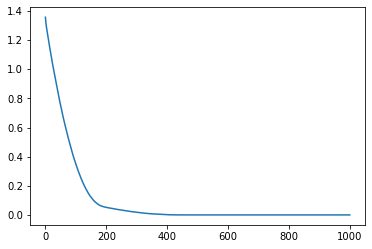

In [14]:
plt.plot(hist.history['loss'])
plt.show()

In [16]:
model.predict(np.array([0]))
model.predict([0])

array([[0.32008445]], dtype=float32)

In [17]:
model.predict(np.array([0.01]))

array([[0.3380879]], dtype=float32)

In [18]:
model.save('model/after_learning.h5')

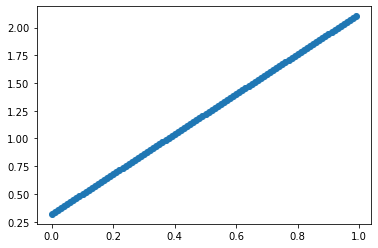

In [19]:
plt.scatter(x=scaled_data_C, y=scaled_data_F)

## 2.2 노이즈가 있는 데이터로 실습

In [21]:
# 평균이 0이고 표준편차가 0.1인 데이터 100
np.random.seed(707)
noise = np.array(np.random.normal(0,0.1,100))
noised_scaled_data_F = noise + scaled_data_F

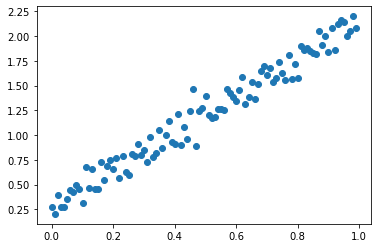

In [22]:
plt.scatter(x = scaled_data_C, y = noised_scaled_data_F)
plt.show()

In [24]:
# 3. 모델 구성
model2 = Sequential()
model2.add(Dense(1, input_dim=1))
# 4. 학습과정 설정
model2.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
               #손실함수   # 옵티마이져         #평가지표
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
# 5. 학습시키기
hist2 = model2.fit(scaled_data_C, noised_scaled_data_F, epochs=1000, verbose=2)

Epoch 1/1000
4/4 - 0s - loss: 3.9327 - mae: 1.7769
Epoch 2/1000
4/4 - 0s - loss: 3.8912 - mae: 1.7659
Epoch 3/1000
4/4 - 0s - loss: 3.8593 - mae: 1.7578
Epoch 4/1000
4/4 - 0s - loss: 3.8308 - mae: 1.7503
Epoch 5/1000
4/4 - 0s - loss: 3.8072 - mae: 1.7442
Epoch 6/1000
4/4 - 0s - loss: 3.7837 - mae: 1.7381
Epoch 7/1000
4/4 - 0s - loss: 3.7585 - mae: 1.7315
Epoch 8/1000
4/4 - 0s - loss: 3.7340 - mae: 1.7248
Epoch 9/1000
4/4 - 0s - loss: 3.7120 - mae: 1.7191
Epoch 10/1000
4/4 - 0s - loss: 3.6908 - mae: 1.7134
Epoch 11/1000
4/4 - 0s - loss: 3.6708 - mae: 1.7080
Epoch 12/1000
4/4 - 0s - loss: 3.6496 - mae: 1.7025
Epoch 13/1000
4/4 - 0s - loss: 3.6252 - mae: 1.6960
Epoch 14/1000
4/4 - 0s - loss: 3.6038 - mae: 1.6901
Epoch 15/1000
4/4 - 0s - loss: 3.5834 - mae: 1.6847
Epoch 16/1000
4/4 - 0s - loss: 3.5612 - mae: 1.6787
Epoch 17/1000
4/4 - 0s - loss: 3.5412 - mae: 1.6732
Epoch 18/1000
4/4 - 0s - loss: 3.5193 - mae: 1.6673
Epoch 19/1000
4/4 - 0s - loss: 3.4968 - mae: 1.6611
Epoch 20/1000
4/4 - 0

Epoch 158/1000
4/4 - 0s - loss: 1.2287 - mae: 0.9129
Epoch 159/1000
4/4 - 0s - loss: 1.2173 - mae: 0.9081
Epoch 160/1000
4/4 - 0s - loss: 1.2062 - mae: 0.9038
Epoch 161/1000
4/4 - 0s - loss: 1.1944 - mae: 0.8990
Epoch 162/1000
4/4 - 0s - loss: 1.1826 - mae: 0.8941
Epoch 163/1000
4/4 - 0s - loss: 1.1718 - mae: 0.8899
Epoch 164/1000
4/4 - 0s - loss: 1.1606 - mae: 0.8851
Epoch 165/1000
4/4 - 0s - loss: 1.1498 - mae: 0.8806
Epoch 166/1000
4/4 - 0s - loss: 1.1395 - mae: 0.8765
Epoch 167/1000
4/4 - 0s - loss: 1.1290 - mae: 0.8720
Epoch 168/1000
4/4 - 0s - loss: 1.1180 - mae: 0.8673
Epoch 169/1000
4/4 - 0s - loss: 1.1065 - mae: 0.8626
Epoch 170/1000
4/4 - 0s - loss: 1.0954 - mae: 0.8577
Epoch 171/1000
4/4 - 0s - loss: 1.0847 - mae: 0.8532
Epoch 172/1000
4/4 - 0s - loss: 1.0751 - mae: 0.8489
Epoch 173/1000
4/4 - 0s - loss: 1.0665 - mae: 0.8453
Epoch 174/1000
4/4 - 0s - loss: 1.0574 - mae: 0.8414
Epoch 175/1000
4/4 - 0s - loss: 1.0471 - mae: 0.8369
Epoch 176/1000
4/4 - 0s - loss: 1.0372 - mae: 

Epoch 313/1000
4/4 - 0s - loss: 0.2993 - mae: 0.4746
Epoch 314/1000
4/4 - 0s - loss: 0.2977 - mae: 0.4732
Epoch 315/1000
4/4 - 0s - loss: 0.2962 - mae: 0.4719
Epoch 316/1000
4/4 - 0s - loss: 0.2943 - mae: 0.4704
Epoch 317/1000
4/4 - 0s - loss: 0.2927 - mae: 0.4690
Epoch 318/1000
4/4 - 0s - loss: 0.2909 - mae: 0.4673
Epoch 319/1000
4/4 - 0s - loss: 0.2896 - mae: 0.4662
Epoch 320/1000
4/4 - 0s - loss: 0.2883 - mae: 0.4650
Epoch 321/1000
4/4 - 0s - loss: 0.2870 - mae: 0.4638
Epoch 322/1000
4/4 - 0s - loss: 0.2854 - mae: 0.4624
Epoch 323/1000
4/4 - 0s - loss: 0.2841 - mae: 0.4612
Epoch 324/1000
4/4 - 0s - loss: 0.2831 - mae: 0.4603
Epoch 325/1000
4/4 - 0s - loss: 0.2822 - mae: 0.4595
Epoch 326/1000
4/4 - 0s - loss: 0.2815 - mae: 0.4590
Epoch 327/1000
4/4 - 0s - loss: 0.2802 - mae: 0.4578
Epoch 328/1000
4/4 - 0s - loss: 0.2791 - mae: 0.4568
Epoch 329/1000
4/4 - 0s - loss: 0.2783 - mae: 0.4560
Epoch 330/1000
4/4 - 0s - loss: 0.2771 - mae: 0.4551
Epoch 331/1000
4/4 - 0s - loss: 0.2760 - mae: 

Epoch 468/1000
4/4 - 0s - loss: 0.1579 - mae: 0.3395
Epoch 469/1000
4/4 - 0s - loss: 0.1572 - mae: 0.3386
Epoch 470/1000
4/4 - 0s - loss: 0.1565 - mae: 0.3377
Epoch 471/1000
4/4 - 0s - loss: 0.1557 - mae: 0.3369
Epoch 472/1000
4/4 - 0s - loss: 0.1550 - mae: 0.3361
Epoch 473/1000
4/4 - 0s - loss: 0.1543 - mae: 0.3353
Epoch 474/1000
4/4 - 0s - loss: 0.1536 - mae: 0.3346
Epoch 475/1000
4/4 - 0s - loss: 0.1529 - mae: 0.3337
Epoch 476/1000
4/4 - 0s - loss: 0.1522 - mae: 0.3330
Epoch 477/1000
4/4 - 0s - loss: 0.1514 - mae: 0.3323
Epoch 478/1000
4/4 - 0s - loss: 0.1507 - mae: 0.3315
Epoch 479/1000
4/4 - 0s - loss: 0.1502 - mae: 0.3310
Epoch 480/1000
4/4 - 0s - loss: 0.1494 - mae: 0.3301
Epoch 481/1000
4/4 - 0s - loss: 0.1487 - mae: 0.3293
Epoch 482/1000
4/4 - 0s - loss: 0.1480 - mae: 0.3285
Epoch 483/1000
4/4 - 0s - loss: 0.1472 - mae: 0.3277
Epoch 484/1000
4/4 - 0s - loss: 0.1464 - mae: 0.3266
Epoch 485/1000
4/4 - 0s - loss: 0.1457 - mae: 0.3259
Epoch 486/1000
4/4 - 0s - loss: 0.1450 - mae: 

Epoch 623/1000
4/4 - 0s - loss: 0.0675 - mae: 0.2205
Epoch 624/1000
4/4 - 0s - loss: 0.0670 - mae: 0.2198
Epoch 625/1000
4/4 - 0s - loss: 0.0666 - mae: 0.2192
Epoch 626/1000
4/4 - 0s - loss: 0.0662 - mae: 0.2185
Epoch 627/1000
4/4 - 0s - loss: 0.0657 - mae: 0.2176
Epoch 628/1000
4/4 - 0s - loss: 0.0652 - mae: 0.2167
Epoch 629/1000
4/4 - 0s - loss: 0.0649 - mae: 0.2161
Epoch 630/1000
4/4 - 0s - loss: 0.0644 - mae: 0.2153
Epoch 631/1000
4/4 - 0s - loss: 0.0640 - mae: 0.2146
Epoch 632/1000
4/4 - 0s - loss: 0.0635 - mae: 0.2138
Epoch 633/1000
4/4 - 0s - loss: 0.0632 - mae: 0.2133
Epoch 634/1000
4/4 - 0s - loss: 0.0628 - mae: 0.2126
Epoch 635/1000
4/4 - 0s - loss: 0.0623 - mae: 0.2117
Epoch 636/1000
4/4 - 0s - loss: 0.0621 - mae: 0.2113
Epoch 637/1000
4/4 - 0s - loss: 0.0617 - mae: 0.2107
Epoch 638/1000
4/4 - 0s - loss: 0.0613 - mae: 0.2099
Epoch 639/1000
4/4 - 0s - loss: 0.0609 - mae: 0.2093
Epoch 640/1000
4/4 - 0s - loss: 0.0606 - mae: 0.2086
Epoch 641/1000
4/4 - 0s - loss: 0.0602 - mae: 

Epoch 778/1000
4/4 - 0s - loss: 0.0210 - mae: 0.1205
Epoch 779/1000
4/4 - 0s - loss: 0.0208 - mae: 0.1199
Epoch 780/1000
4/4 - 0s - loss: 0.0207 - mae: 0.1195
Epoch 781/1000
4/4 - 0s - loss: 0.0205 - mae: 0.1190
Epoch 782/1000
4/4 - 0s - loss: 0.0203 - mae: 0.1186
Epoch 783/1000
4/4 - 0s - loss: 0.0202 - mae: 0.1182
Epoch 784/1000
4/4 - 0s - loss: 0.0200 - mae: 0.1177
Epoch 785/1000
4/4 - 0s - loss: 0.0199 - mae: 0.1173
Epoch 786/1000
4/4 - 0s - loss: 0.0197 - mae: 0.1169
Epoch 787/1000
4/4 - 0s - loss: 0.0196 - mae: 0.1165
Epoch 788/1000
4/4 - 0s - loss: 0.0194 - mae: 0.1160
Epoch 789/1000
4/4 - 0s - loss: 0.0193 - mae: 0.1157
Epoch 790/1000
4/4 - 0s - loss: 0.0191 - mae: 0.1153
Epoch 791/1000
4/4 - 0s - loss: 0.0189 - mae: 0.1147
Epoch 792/1000
4/4 - 0s - loss: 0.0188 - mae: 0.1143
Epoch 793/1000
4/4 - 0s - loss: 0.0187 - mae: 0.1140
Epoch 794/1000
4/4 - 0s - loss: 0.0186 - mae: 0.1137
Epoch 795/1000
4/4 - 0s - loss: 0.0185 - mae: 0.1133
Epoch 796/1000
4/4 - 0s - loss: 0.0184 - mae: 

Epoch 933/1000
4/4 - 0s - loss: 0.0113 - mae: 0.0887
Epoch 934/1000
4/4 - 0s - loss: 0.0113 - mae: 0.0887
Epoch 935/1000
4/4 - 0s - loss: 0.0113 - mae: 0.0887
Epoch 936/1000
4/4 - 0s - loss: 0.0113 - mae: 0.0887
Epoch 937/1000
4/4 - 0s - loss: 0.0113 - mae: 0.0888
Epoch 938/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0888
Epoch 939/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0887
Epoch 940/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0888
Epoch 941/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0886
Epoch 942/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0886
Epoch 943/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0888
Epoch 944/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0888
Epoch 945/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0888
Epoch 946/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0889
Epoch 947/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0888
Epoch 948/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0891
Epoch 949/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0890
Epoch 950/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0888
Epoch 951/1000
4/4 - 0s - loss: 0.0112 - mae: 

In [28]:
model2.predict(np.array([0.01]))

array([[0.31189582]], dtype=float32)

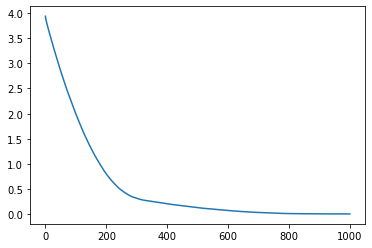

In [29]:
plt.plot(hist2.history['loss'])

In [30]:
model2.save('model/noise_after_learning.h5')